## MultiAsset Pricing Data
This notebook demonstrates how to use the get_history calls of the Access layer to get historical pricing data for a variety of asset classes. The Access layer provides a simplified interface designed for FinCoders. 

## Assets:

### Equity Index & Constituents
- **.SPX** : S&P 500 INDEX
- **.DJI** : DOW JONES INDUSTRIAL AVERAGE INDEX
- **.STOXX50E** : EURO STOXX 50 EUR PRICE INDEX
- **.FTSE** : FTSE 100 INDEX
- **.N225** : NIKKEI 225 INDEX
- **.HSI** : HANG SENG INDEX

*retrieving constituents requires use of QA Direct and is outlined in a separate notebook*


### Volatilty Index
- **.VIX** : CBOE MARKET VOLATILITY INDEX

### Stocks
- **IBM.N** IBM, INTERNATIONAL BUSINESS MACHINES CORP (New York Stock Exchange)
- **AAPL.O** Apple Inc (NASDAQ Global Select Consolidated)


### Spot Gold & Spot Silver
- **XAU=** : Spot Gold 
- **XAG=** : Spot Silver

### FX
- **GBP=** : UK POUND STERLING/US DOLLAR FX SPOT RATE 

### Treasury Yield Index
- **.TNX** : CBOE 10 YEAR TREASURY YIELD INDEX

### ETF's
- **SPY.P**  : SPDR S&P 500 ETF Trust
- **CSP1.L** : iShares Core S&P 500 UCITS ETF
- **1306.T** : Nomura TOPIX ETF

### Futures Equity Index
*Note that here we retrieve the continuation RIC, suffixed with 'c1', not the individual contract rics*
- **FFIc1** : Futures FTSE Index
- **ESc1**  :  Futures eMini S&P Index

### Futures Commodities
- **CMCUc1** : LME Cash Copper Composite Commodity Future
- **LCOc1**  : Futures Brent Crude (spot month)
- **CLc1**   : NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation



#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 

----

## Some Imports to start with

In [1]:
import refinitiv.data as rd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
%matplotlib inline

### Open the data session

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x12f8875b0 {name='workspace'}>

## Retrieve data

### S&P 500 data : A simple example
This example shows explictly shows how call the end of day pricing API to retrieve daily data (we'll move this code into functions in the next example).

The output is displayed in simple table and chart.

In [3]:
d_now = datetime.now().date()
sdate = d_now - timedelta(days=280)
print(d_now,sdate)

ric = '.SPX'    # S&P 500

# Specify a date range to retrieve the pricing data - default interval: daily
data_price = rd.get_history(
    universe = ric,
    #fields = ['TRDPRC_1'],
    start = str(sdate),
    end = str(d_now)
)

data_price.head()

2024-02-16 2023-05-12


.SPX,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1
Date,,,,
2023-05-15,4136.28,4126.65,4141.25,4110.27
2023-05-16,4109.9,4127.95,4135.54,4109.86
2023-05-17,4158.77,4122.85,4164.67,4113.62
2023-05-18,4198.05,4157.68,4202.2,4153.5
2023-05-19,4191.98,4204.15,4212.91,4180.2


### check min max

In [4]:
print('Min: ', data_price.index.time.min(), ' Max: ', data_price.index.time.max(), ' Count: ', len(data_price))

Min:  00:00:00  Max:  00:00:00  Count:  191


<Axes: title={'center': '.SPX Trade Price'}, xlabel='Date'>

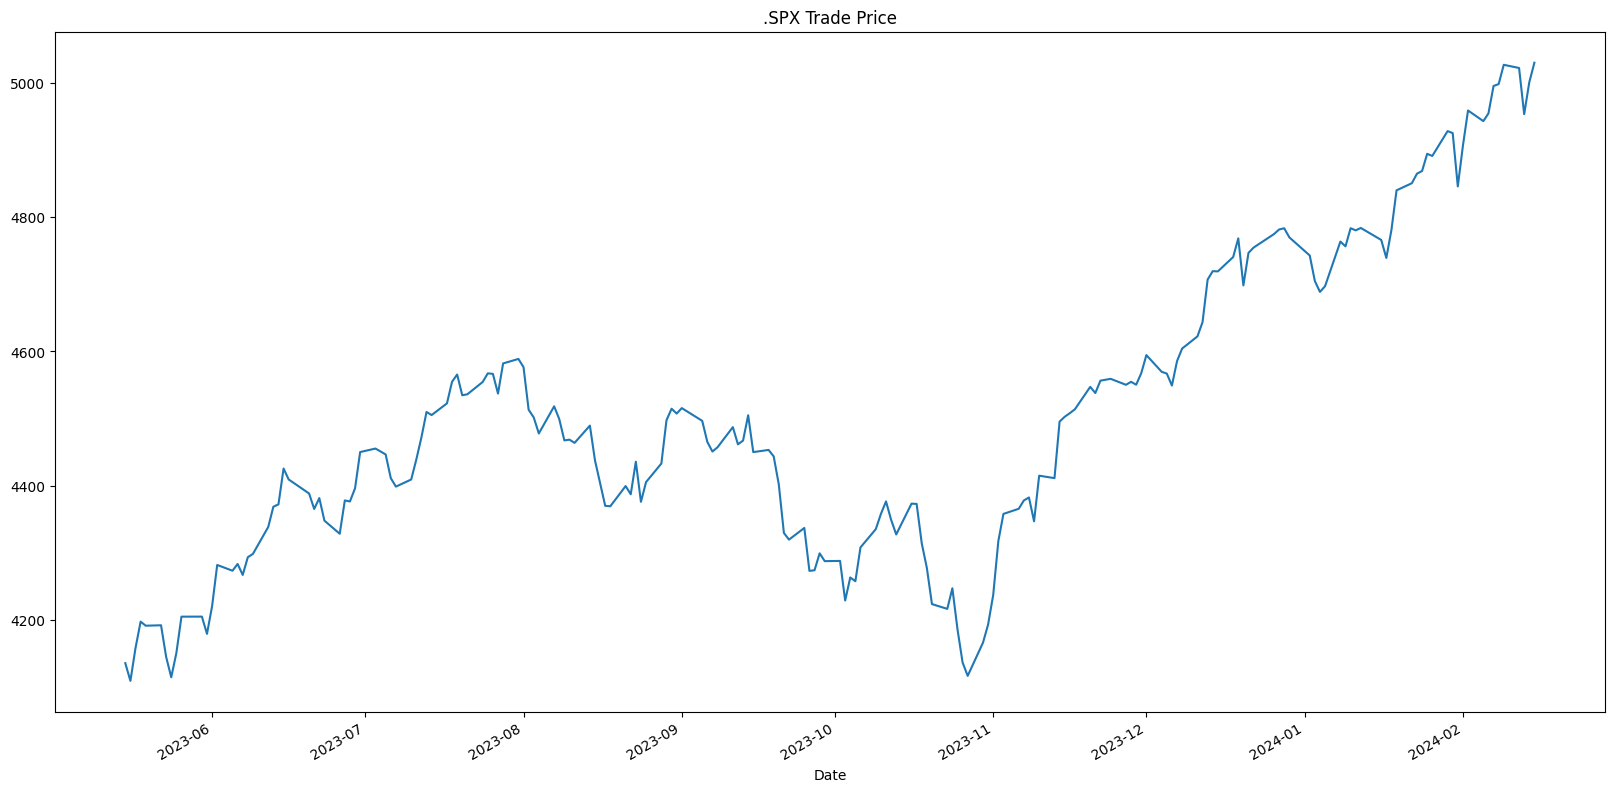

In [5]:
# Chart
data_price['TRDPRC_1'].plot(title=f'{ric} Trade Price', figsize=(20,10))

## Help function to capture data
Simplify the request logic to handle multiple examples.

In [6]:
def get_historical_data(ric, start_date='2017-01-01', end_date='2018-01-01'):
    # Retrieve historical data - default interval: daily
    data = rd.get_history(
        universe = ric,
        start = start_date,
        end = end_date
    )
    
    return data

In [7]:
# To demonstrate usage
get_historical_data(ric).head()

.SPX,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1
Date,,,,
2017-01-03,2257.83,2251.57,2263.88,2245.13
2017-01-04,2270.75,2261.6,2272.82,2261.6
2017-01-05,2269.0,2268.18,2271.5,2260.45
2017-01-06,2276.98,2271.14,2282.1,2264.06
2017-01-09,2268.9,2273.59,2275.49,2268.9


### A selection of Equity Indices
We can also loop over a selection of RIC's, in this case, some of the major Equity Indices.

Each dataframe is stored in a Python dict, with the key the Index RIC.

In [8]:
equity_index_price_data_dict = dict()

equity_index_ric_list = ['.SPX', '.DJI', '.STOXX50E', '.FTSE', '.N225', '.HSI']

for ric in equity_index_ric_list:
    print('RIC: {0}'.format(ric))
    try:
        equity_index_price_data_dict[ric] = get_historical_data(ric)
    except:
        print('failed for ric {0}'.format(ric))

RIC: .SPX
RIC: .DJI
RIC: .STOXX50E
RIC: .FTSE
RIC: .N225
RIC: .HSI


Output a single index from the above results

In [9]:
print('*' * 80, '\n', 'Dow Jones Industrial Average Index')
display(equity_index_price_data_dict['.DJI'].head(5))   

******************************************************************************** 
 Dow Jones Industrial Average Index


.DJI,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1,ACVOL_UNS,ASK,THEO_OPEN,BID,NUM_MOVES
Date,,,,,,,,,
2017-01-03,19881.76,19872.86,19938.53,19775.93,339176105,19914.29,19901.35,19744.59,24602
2017-01-04,19942.16,19890.94,19956.14,19878.83,280005720,19987.09,19916.96,19743.49,24602
2017-01-05,19899.29,19924.56,19948.6,19811.12,269920430,19970.24,19922.58,19811.84,24602
2017-01-06,19963.8,19906.96,19999.63,19834.08,277701805,20019.34,19900.11,19849.02,24602
2017-01-09,19887.38,19931.41,19943.78,19887.38,287505462,19950.79,19927.85,19809.92,24602


In [10]:
for k,v in equity_index_price_data_dict.items():
    print(f'{k} earliest date: {v.index[0].to_pydatetime():%Y-%m-%d}')

.SPX earliest date: 2017-01-03
.DJI earliest date: 2017-01-03
.STOXX50E earliest date: 2017-01-02
.FTSE earliest date: 2017-01-03
.N225 earliest date: 2017-01-04
.HSI earliest date: 2017-01-03


# Addtional Asset Classes: 
### Volatilty Index
- **.VIX** : CBOE MARKET VOLATILITY INDEX

### Stocks
- **IBM.N** IBM, INTERNATIONAL BUSINESS MACHINES CORP (New York Stock Exchange)
- **AAPL.O** Apple Inc (NASDAQ Global Select Consolidated)


### Spot Gold & Spot Silver
- **XAU=** : Spot Gold 
- **XAG=** : Spot Silver

### FX
- **GBP=** : UK POUND STERLING/US DOLLAR FX SPOT RAT   

### Treasury Yield Index
- **.TNX** : CBOE 10 YEAR TREASURY YIELD INDEX

### ETF's
- **SPY.P**  : SPDR S&P 500 ETF Trust
- **CSP1.L** : iShares Core S&P 500 UCITS ETF
- **1306.T** : Nomura TOPIX ETF

### Futures Equity Index
*Note that here we retrieve the continuation RIC, suffixed with 'c1', not the individual contract rics*
- **FFIc1** : Futures FTSE Index
- **ESc1**  :  Futures eMini S&P Index

### Futures Commodities
- **CMCUc1** : LME Cash Copper Composite Commodity Future
- **LCOc1**  : Futures Brent Crude (spot month)
- **CLc1**   : NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation


In [11]:
variety_of_assets_rics = ['.VIX', 'IBM.N','AAPL.O','FFIc1','ESc1','XAU=','XAG=', 
                          '.TNX','SPY.P','CSP1.L','1306.T','CMCU0','CLc1']

price_data_dict = dict()

for ric in variety_of_assets_rics:
    print('RIC: {0}'.format(ric))
    try:
        price_data_dict[ric] = get_historical_data(ric)
    except:
        print('failed for ric {0}'.format(ric))

RIC: .VIX
RIC: IBM.N
RIC: AAPL.O
RIC: FFIc1
RIC: ESc1
RIC: XAU=
RIC: XAG=
RIC: .TNX
RIC: SPY.P
RIC: CSP1.L
RIC: 1306.T
RIC: CMCU0
RIC: CLc1


In [12]:
price_data_dict['CLc1']

CLc1,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1,ACVOL_UNS,BID,ASK,OPINT_1,TOTCNTRVOL,TOTCNTROI,...,BLKVOLUM,VOL_X_PRC1,ORDBK_VOL,VWAP,UPLIMIT,LOLIMIT,EXPIR_DATE,CRT_MNTH,SETL_PCHNG,SETL_NCHNG
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,52.47,54.2,55.24,52.11,727793,52.44,52.52,454577,1434526,2089324,...,4641,<NA>,711378,<NA>,<NA>,<NA>,20170120,201702,<NA>,<NA>
2017-01-04,53.35,52.49,53.43,52.15,512641,53.31,53.39,451079,942108,2100807,...,1923,<NA>,498187,<NA>,<NA>,<NA>,20170120,201702,<NA>,<NA>
2017-01-05,53.76,53.39,54.12,52.79,517362,53.7,53.82,441948,893826,2104746,...,818,<NA>,504857,<NA>,<NA>,<NA>,20170120,201702,<NA>,<NA>
2017-01-06,53.7,53.73,54.32,53.32,528333,53.65,53.72,417847,954336,2112926,...,882,<NA>,500340,<NA>,<NA>,<NA>,20170120,201702,<NA>,<NA>
2017-01-09,51.79,53.75,53.83,51.76,564893,51.75,51.8,377643,1205292,2114006,...,9066,<NA>,524010,<NA>,<NA>,<NA>,20170120,201702,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,58.35,58.21,58.5,57.87,324554,58.28,58.44,481977,548977,2436081,...,990,<NA>,306789,<NA>,<NA>,<NA>,20180122,201802,<NA>,<NA>
2017-12-26,59.8,58.4,60.01,58.32,437785,59.76,59.84,484886,692220,2460193,...,823,<NA>,424824,<NA>,<NA>,<NA>,20180122,201802,<NA>,<NA>
2017-12-27,59.59,59.79,59.93,59.33,402396,59.58,59.62,481286,636473,2463720,...,1918,<NA>,388617,<NA>,<NA>,<NA>,20180122,201802,<NA>,<NA>


Output the earliest date in the timeseries...

In [13]:
for k,v in price_data_dict.items():
    print(f'{k} earliest date: {v.index[0].to_pydatetime():%Y-%m-%d}')

.VIX earliest date: 2017-01-03
IBM.N earliest date: 2017-01-03
AAPL.O earliest date: 2017-01-03
FFIc1 earliest date: 2017-01-02
ESc1 earliest date: 2017-01-03
XAU= earliest date: 2017-01-03
XAG= earliest date: 2017-01-03
.TNX earliest date: 2017-01-03
SPY.P earliest date: 2017-01-03
CSP1.L earliest date: 2017-01-03
1306.T earliest date: 2017-01-04
CMCU0 earliest date: 2017-01-03
CLc1 earliest date: 2017-01-03


### Intraday Prices

Support for:
 - 1min
 - 5min
 - 10min
 - 30min
 - 60min/hourly
 
 Documentation can be found within the [API Playground](https://apidocs.refinitiv.com/Apps/ApiDocs#/details/L2RhdGEvaGlzdG9yaWNhbC1wcmljaW5nL3Yx/L3ZpZXdzL2V2ZW50cw==/POST/README).


In [14]:
ric = '.SPX'    # S&P 500

# Specify a date range to retrieve the pricing data - default interval: daily
data_price = rd.get_history(
    universe = ric,
    start = '2023-05-23T15:00:00Z',
    end = '2023-05-23T20:00:00Z',
    interval = "1min"
)

data_price.head(25)

.SPX,HIGH_1,LOW_1,OPEN_PRC,TRDPRC_1,NUM_MOVES,BID_HIGH_1,BID_LOW_1,OPEN_BID,BID,BID_NUMMOV,ASK_HIGH_1,ASK_LOW_1,OPEN_ASK,ASK,ASK_NUMMOV
Timestamp,,,,,,,,,,,,,,,
2023-05-23 15:00:00,4180.48,4178.42,4178.97,4180.45,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:01:00,4180.65,4179.62,4180.33,4180.31,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:02:00,4182.5,4180.33,4180.37,4182.5,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:03:00,4183.05,4182.36,4182.53,4182.57,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:04:00,4182.64,4181.97,4182.59,4182.02,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:05:00,4182.83,4181.87,4182.07,4182.47,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:06:00,4183.11,4182.04,4182.43,4183.03,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:07:00,4183.04,4182.33,4183.02,4182.84,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2023-05-23 15:08:00,4183.26,4182.45,4182.79,4182.45,60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


### Close the session

In [15]:
rd.close_session()